In [28]:
from keylogParser import KeylogsParser, read_file
bigrams = ['th', 'he', 'gh', 'nd', 'ne', 'in', 'er', 'an', 'ng', 'me', 'we', 'is', 'at', 'on', 'es', 'ay', 'or', 'hi']

parser = KeylogsParser(bigrams)
lines_oskar = read_file('oskar')
lines_johan = read_file('johan')
lines_aoife = read_file('aoife')
lines_luke = read_file('luke')
results = {
	'oskar': parser.get_pressed_data_diffs(lines_oskar),
 	'johan': parser.get_pressed_data_diffs(lines_johan),
 	'aoife': parser.get_pressed_data_diffs(lines_aoife),
	'luke': parser.get_pressed_data_diffs(lines_luke)
}
stats = {
	'oskar': parser.get_stats(results['oskar']),
	'johan': parser.get_stats(results['johan']),
	'aoife': parser.get_stats(results['aoife']),
	'luke': parser.get_stats(results['luke'])
}


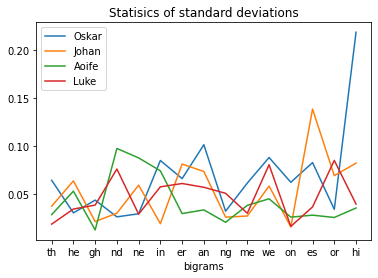

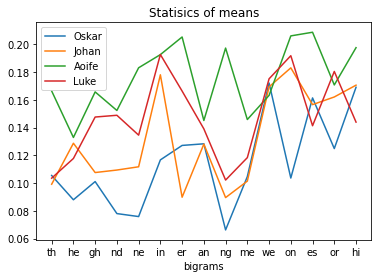

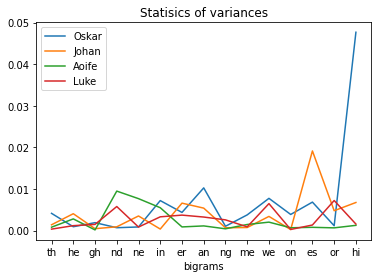

In [2]:
parser.print_graph(stats)


In [40]:
import numpy as np

def mse(Y_true, T_pred): 
	return np.square(np.subtract(Y_true, T_pred)).mean()


test_lines = read_file('test')
vector_test = parser.get_pressed_data_diffs(test_lines)
test_stats = parser.get_stats(vector_test)

# print(vector_luke)

for user in ['luke', 'aoife', 'johan', 'oskar']:
	bigram_diff = list(set(stats[user]['present_bigrams']) - set(test_stats['present_bigrams']))
	result_copy = results[user]
	for bg in bigram_diff:
		if (bg in result_copy):
			del result_copy[bg]

	user_stats = parser.get_stats(result_copy)
	print("\n")
	for stat in ['std_devs', 'means', 'variances']:
		MSE = mse(test_stats['std_devs'], user_stats['std_devs'])
		print('For user: ' + user + ' and stat: ' + stat + ' MSE: ' + str(MSE))



For user: luke and stat: std_devs MSE: 0.005387865910453519
For user: luke and stat: means MSE: 0.005387865910453519
For user: luke and stat: variances MSE: 0.005387865910453519


For user: aoife and stat: std_devs MSE: 0.007333435416871752
For user: aoife and stat: means MSE: 0.007333435416871752
For user: aoife and stat: variances MSE: 0.007333435416871752


For user: johan and stat: std_devs MSE: 0.001755566478225221
For user: johan and stat: means MSE: 0.001755566478225221
For user: johan and stat: variances MSE: 0.001755566478225221


For user: oskar and stat: std_devs MSE: 0.0030787413478240134
For user: oskar and stat: means MSE: 0.0030787413478240134
For user: oskar and stat: variances MSE: 0.0030787413478240134
